# Develop Deep Learning Models for Natural Language in Python

## Chapter 10 - Project: Develop a Neural Bag-of-Words Model for Sentimental Analysis

In [1]:
import re
import os
import numpy as np
from random import shuffle

### 10.4 - Bag-of-Words ReprRepresentation

#### Load Data

In [2]:
# Most Data preperation was done on chapter 9. We just load the cleaned data

root = '/content/drive/MyDrive/NLP-In-Depth/Develop Deep Learning Models for Natural Language in Python/txt_sentoken/'

def load_clean_data(root):

  positive_reviews, negative_reviews, vocab = None, None, None

  with open(root + '/positive.txt', 'r') as file:
    positive_reviews = file.read().split('\n')

  with open(root + '/negative.txt', 'r') as file:
    negative_reviews = file.read().split('\n')

  with open(root + '/vocab.txt', 'r') as file:
    vocab = file.read().split('\n')

  data = positive_reviews + negative_reviews
  labels = [1 for _ in range(len(positive_reviews))] + [0 for _ in range(len(negative_reviews))]

  return data, labels, vocab

#### Split Data into Training, validation and test set

In [3]:
def split_data(data, labels, split = 200):

  # Make tuple
  reviews_data = [(data[i], labels[i]) for i in range(len(data))]

  # Split
  train_data = reviews_data[split:]
  test_data = reviews_data[:split]

  # Shuffle
  shuffle(train_data)
  shuffle(test_data)

  return train_data, test_data

In [4]:
data, labels, vocab = load_clean_data(root)
train_data, test_data = split_data(data, labels, 200)

#### Keras Tokenizer API

In [8]:
from keras.preprocessing.text import Tokenizer

def create_tokenizer(vocab):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(vocab)
  return tokenizer

# Get raw reviews
train_texts = [review for (review, label) in train_data]
test_texts = [review for (review, label) in test_data]

# Get labels
train_labels = [label for (review, label) in train_data]
test_labels = [label for (review, label) in test_data]

# Create tokenizer (With predefined vocabulary)
tokenizer = create_tokenizer(vocab)

# Convert texts to matrix
X_train = tokenizer.texts_to_matrix(train_texts, mode = 'freq')
X_test = tokenizer.texts_to_matrix(test_texts, mode = 'freq')

print(X_train.shape, X_test.shape)

(1800, 26791) (200, 26791)


### 10.5 - First Sentimental Analysis Model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                1339600   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 1,339,651
Trainable params: 1,339,651
Non-trainable params: 0
_________________________________________________________________


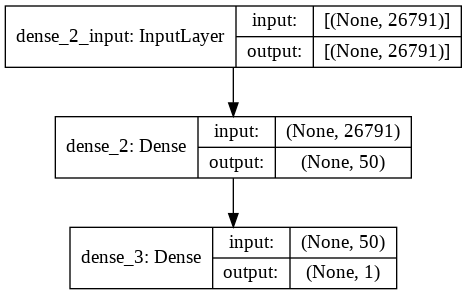

In [9]:
from keras.models import Model
from keras.layers import Dense
from keras import Sequential
from keras.utils.vis_utils import plot_model

n_words = X_train.shape[1]

model = Sequential()
model.add(Dense(units = 50, input_shape = (n_words,), activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()
plot_model(model, show_shapes = True)

In [10]:
# Train model
model.fit(X_train, np.array(train_labels), epochs = 10, verbose = 2)

Epoch 1/10
57/57 - 15s - loss: 0.6881 - accuracy: 0.5528
Epoch 2/10
57/57 - 1s - loss: 0.6780 - accuracy: 0.5556
Epoch 3/10
57/57 - 1s - loss: 0.6648 - accuracy: 0.5556
Epoch 4/10
57/57 - 1s - loss: 0.6445 - accuracy: 0.5606
Epoch 5/10
57/57 - 1s - loss: 0.6168 - accuracy: 0.6806
Epoch 6/10
57/57 - 1s - loss: 0.5842 - accuracy: 0.7444
Epoch 7/10
57/57 - 1s - loss: 0.5476 - accuracy: 0.8156
Epoch 8/10
57/57 - 1s - loss: 0.5082 - accuracy: 0.8800
Epoch 9/10
57/57 - 1s - loss: 0.4671 - accuracy: 0.9306
Epoch 10/10
57/57 - 1s - loss: 0.4273 - accuracy: 0.9411


In [11]:
# Evaluate Model
loss, acc = model.evaluate(X_test, np.array(test_labels), verbose = 2)
print('Accuracy:', acc * 100)

7/7 - 1s - loss: 0.6808 - accuracy: 0.5800
Accuracy: 57.999998331069946
